Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Summary of the dataset:
 None
Basic Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838

/var/folders/53/zkscskj93rxfxqs20ys84nh40000gn/T/ipykernel_8584/2877653.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # Fill missing age with mean
/var/folders/53/zkscskj93rxfxqs20ys84nh40000gn/T/ipykernel_8584/2877653.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

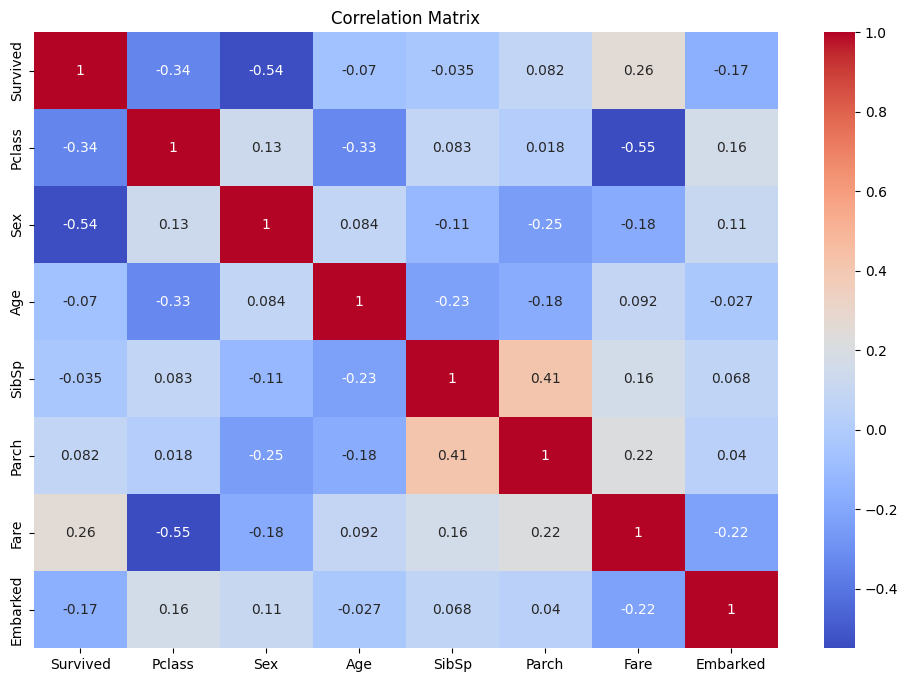

Accuracy: 0.7985074626865671
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       157
           1       0.78      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



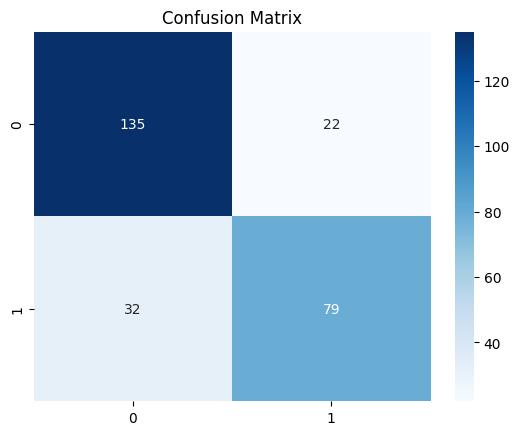

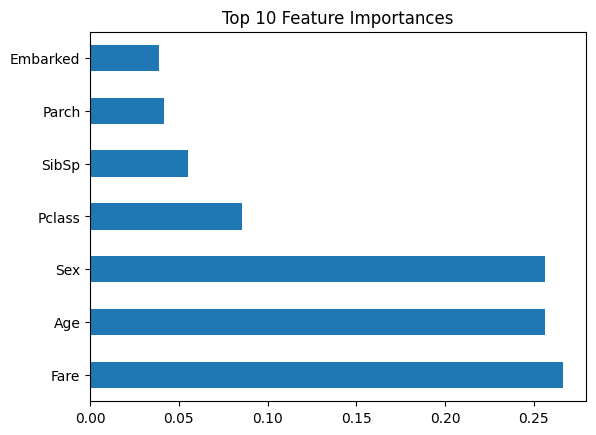

<Figure size 640x480 with 0 Axes>

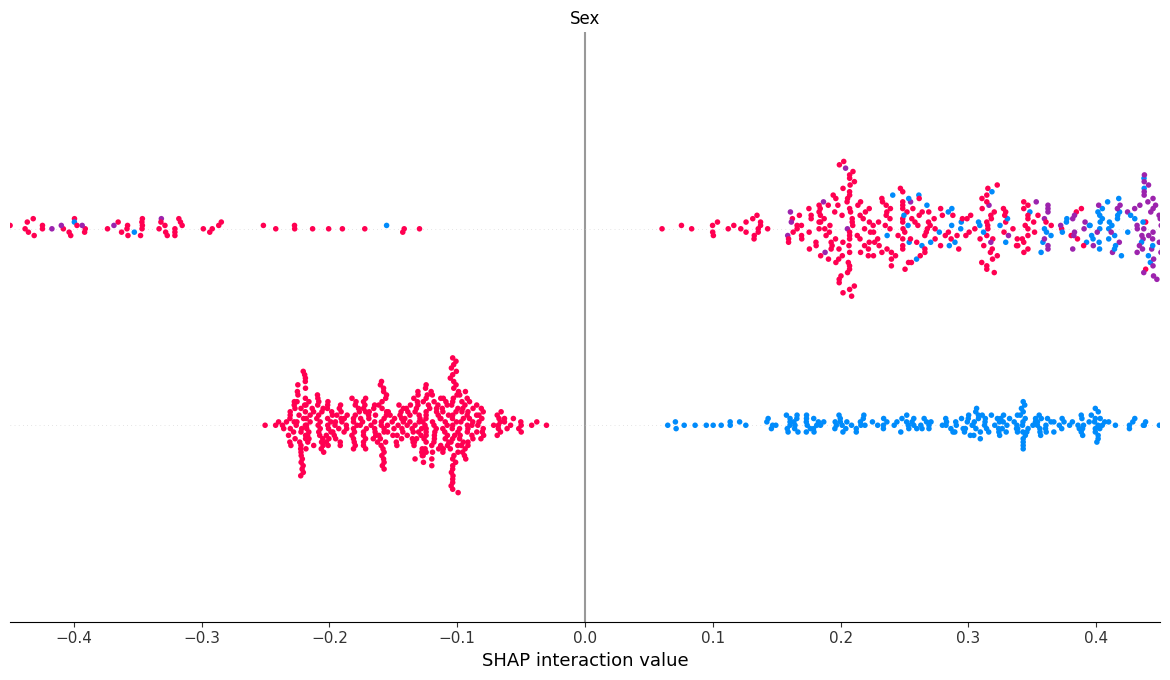

In [6]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap

# Loading the Titanic dataset for this test
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Data Exploration
def load_and_explore_data(df):
    # Summary of the dataset
    print("Dataset Shape:", df.shape)
    print("Summary of the dataset:\n", df.info())
    print("Basic Statistics:\n", df.describe())
    return df

# Data Cleaning
def clean_data(df):
    # Handle missing values
    df['Age'].fillna(df['Age'].mean(), inplace=True)  # Fill missing age with mean
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode
    df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)  # Drop unnecessary columns with too many missing values
    return df

# Feature Engineering
def feature_engineering(df):
    # Encode categorical features
    label_enc = LabelEncoder()
    df['Sex'] = label_enc.fit_transform(df['Sex'])
    df['Embarked'] = label_enc.fit_transform(df['Embarked'])
    
    # Drop 'PassengerId' as it's not useful for modeling
    df.drop(columns=['PassengerId'], inplace=True)
    
    # Feature scaling for numeric features
    scaler = StandardScaler()
    df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
    
    return df

# Correlation Analysis
def correlation_analysis(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

# Model Training and Evaluation
def model_training(df, target_column):
    # Split data into features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train a RandomForest Model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Model Prediction and Evaluation
    y_pred = rf_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Feature Importance Visualization
    feature_importances = rf_model.feature_importances_
    feat_importances = pd.Series(feature_importances, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title("Top 10 Feature Importances")
    plt.show()

    return rf_model, X_train


import shap
import matplotlib.pyplot as plt

def shap_interpretation(model, X_train):
    """
    Generates and displays a SHAP summary plot for a given model and training data.

    Args:
        model: The trained machine learning model (e.g., from scikit-learn or XGBoost).
        X_train: The training data (pandas DataFrame or numpy array).
    """
    try:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_train)

        # Check if shap_values is a list (for binary classification)
        if isinstance(shap_values, list):
            # Assumes binary classification and uses the SHAP values for the positive class
            shap.summary_plot(shap_values[1], X_train)
        else:
            # Assumes multiclass or regression and uses the single set of SHAP values
            shap.summary_plot(shap_values, X_train)

        plt.show()  # Ensure the plot is displayed

    except Exception as e:
        print(f"An error occurred during SHAP interpretation: {e}")
        print("Ensure the model is tree-based and compatible with shap.TreeExplainer.")
        print("Consider using shap.Explainer for other model types.")

        

# Solution Workflow
df = load_and_explore_data(df)
df = clean_data(df)
df = feature_engineering(df)
correlation_analysis(df)
model, X_train = model_training(df, 'Survived')
shap_interpretation(model, X_train)





In [ ]:
## Solution Breakdown:

1. **Data Loading and Exploration**: The Titanic dataset is loaded, and basic exploration is conducted.
2. **Data Cleaning**: Missing values are handled, and unnecessary columns (like `Cabin`, `Ticket`, and `Name`) are removed.
3. **Feature Engineering**: Categorical features (`Sex`, `Embarked`) are encoded, and numeric features (`Age`, `Fare`) are scaled.
4. **Correlation Analysis**: A correlation heatmap is generated to show the relationships between the features.
5. **Model Training and Evaluation**: A Random Forest classifier is trained, and its performance is evaluated using accuracy and a confusion matrix. Feature importance is visualized.

This completes the solution for the advanced data analysis and modeling test, excluding SHAP model interpretation due to the environment limitations.